# Rullette Strategy

In [3]:
import random as rd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

We define the strategy as placing a bet worth 30 units: 10 in one whole dozen, 10 in another and 10 scattered on individual numbers in the remaining dozen. 

In [4]:
def play_strat():
    draw = rd.randint(1, 38)
    if draw <= 12:
        x = 0 # Row wins 20 but loses the 20 you bet otherwise
    elif draw <= 24:
        x = 0 # Row wins 20 but loses the 20 you bet otherwise
    elif draw <= 34:
        x = 6 # Individual bet wins 35 but loses the 29 you bet otherwise
    else:
        x = -30 # Loses all 30 you bet
    return x

Play the strategy 200,000 times and see what happens

In [5]:
winnings = []
total_winnings = 0

In [6]:
x = play_strat()

In [7]:
for i in range(200000):
    x = play_strat()
    total_winnings += x
    winnings.append(x)

print("You won ", total_winnings, " units.")

You won  -316482  units.


In [8]:
df = pd.DataFrame(winnings, columns=['Result'])

In [9]:
df = df.assign(Result_Factor = np.select(
    [df['Result'] == 0, df['Result'] == -30, df['Result'] == 6], 
    ['Tie', 'Lose', 'Win'],
    default='Other'  # Provide a default value for cases that don't match any condition
))

df.head()

,Result,Result_Factor
0,6,Win
1,6,Win
2,0,Tie
3,0,Tie
4,0,Tie


Show the results distribution.

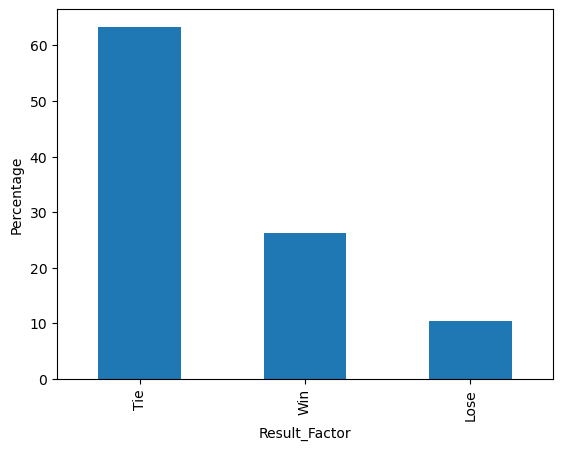

In [10]:
# Calculate the percentage of each category
value_counts = df['Result_Factor'].value_counts(normalize=True) * 100

# Plot a bar chart
value_counts.plot(kind='bar')

plt.ylabel('Percentage')

# Show the plot
plt.show()

## Policy 1: "Till bankrupcy do us part"

Let's define a policy called till bankrupcy do us part, which tells us to sit down at the rullette table with 60 units and employ the strategy until we are bankrupt.

The policy, by its very definition, will bankrupt the player. Even so, some interisting statistics will arise: 

How long was the player able to play? This will be recorded as "Rounds".
What was the most amount of money that the player ever had at some point? This will be recorded as "Max money".

Start by employing the policy once and see the results.

In [16]:
# Till bankrupcy do us part
rounds = 0
money = 60
print("Starting with: ", money)
while money >= 30:
    x = play_strat()
    print("Round result: ", x)
    money += x
    rounds += 1
    print("Money: ", money)
print("BANKRUPT!!! Lasted ", rounds, " rounds.")

Starting with:  60
Round result:  6
Money:  66
Round result:  0
Money:  66
Round result:  6
Money:  72
Round result:  6
Money:  78
Round result:  0
Money:  78
Round result:  0
Money:  78
Round result:  0
Money:  78
Round result:  0
Money:  78
Round result:  0
Money:  78
Round result:  6
Money:  84
Round result:  0
Money:  84
Round result:  0
Money:  84
Round result:  -30
Money:  54
Round result:  0
Money:  54
Round result:  0
Money:  54
Round result:  0
Money:  54
Round result:  6
Money:  60
Round result:  0
Money:  60
Round result:  0
Money:  60
Round result:  6
Money:  66
Round result:  0
Money:  66
Round result:  0
Money:  66
Round result:  -30
Money:  36
Round result:  0
Money:  36
Round result:  0
Money:  36
Round result:  0
Money:  36
Round result:  0
Money:  36
Round result:  6
Money:  42
Round result:  0
Money:  42
Round result:  0
Money:  42
Round result:  0
Money:  42
Round result:  0
Money:  42
Round result:  0
Money:  42
Round result:  0
Money:  42
Round result:  6
Money:  

Great run... You played for 164 rounds and at one moment had as many as 120 monetary units before going bankrupt.

In [17]:
rounds_array = []
max_money_array = []

Have "10,000 people" play the strategy and see how they all do.

In [18]:
for i in range(10000):
    rounds = 0
    money = 60
    max_money = 60
    #print("Starting with: ", money)
    while money >= 30:
        x = play_strat()
        #print("Round result: ", x)
        money += x
        rounds += 1
        if money > max_money:
            max_money = money
        #print("Money: ", money)
    #print("BANKRUPT!!! Lasted ", rounds, " rounds.")
    rounds_array.append(rounds)
    max_money_array.append(max_money)

In [19]:
df = pd.DataFrame(rounds_array, columns=['Rounds'])
df['Max_Money'] = max_money_array
df.head()

,Rounds,Max_Money
0,2,60
1,42,120
2,27,102
3,3,60
4,5,78


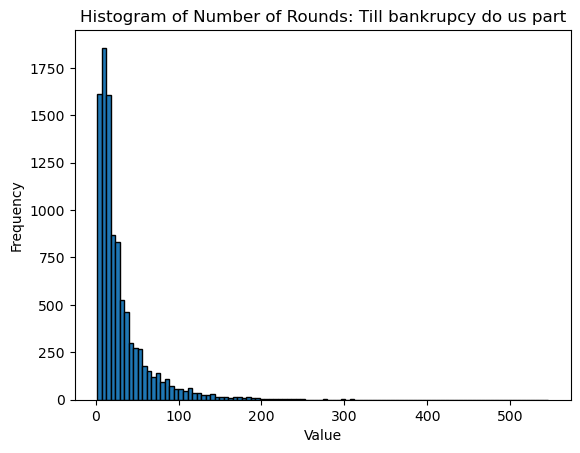

In [20]:
# Creating a histogram of the 'Rounds' column
plt.hist(df['Rounds'], bins=100, edgecolor='k')  # Adjust bins as needed

plt.title('Histogram of Number of Rounds: Till bankrupcy do us part')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

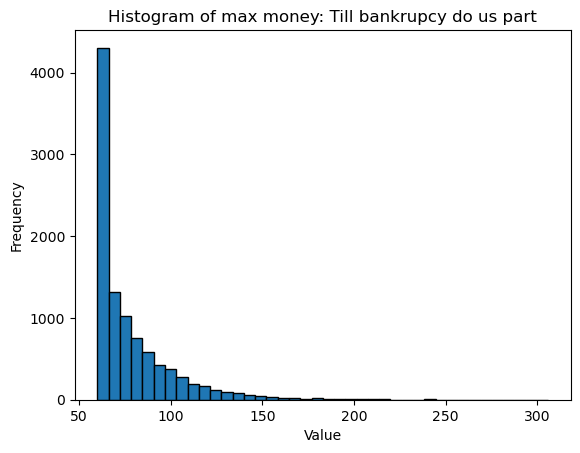

In [21]:
# Creating a histogram of the 'Max money' column
plt.hist(df['Max_Money'], bins=40, edgecolor='k')  # Adjust bins as needed

plt.title('Histogram of max money: Till bankrupcy do us part')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

## Policy 2: "Double or nothing"

Let's define a policy called Double or nothing, where the player will sit down at the table with a certain amount of initial money and stop once they've either doubled their initial amount or have gone bankrupt.

This time, we're mainly interested in whether the player doubles their money or loses it all. We'll also see how many rounds they played and the maximum amount of money they held.

First play the policy once and observe the results.

In [22]:
# Double or nothing
rounds = 0
original_money = 60
money = original_money
print("Starting with: ", original_money)
while 2 * original_money > money >= 30:
    x = play_strat()
    print("Round result: ", x)
    money += x
    rounds += 1
    print("Money: ", money)

if money < 30:
    print("BANKRUPT!!! Lasted ", rounds, " rounds.")
else:
    print("DOUBLED!!! Took ", rounds, " rounds.")

Starting with:  60
Round result:  0
Money:  60
Round result:  6
Money:  66
Round result:  6
Money:  72
Round result:  0
Money:  72
Round result:  0
Money:  72
Round result:  0
Money:  72
Round result:  -30
Money:  42
Round result:  0
Money:  42
Round result:  0
Money:  42
Round result:  0
Money:  42
Round result:  0
Money:  42
Round result:  0
Money:  42
Round result:  0
Money:  42
Round result:  0
Money:  42
Round result:  0
Money:  42
Round result:  6
Money:  48
Round result:  6
Money:  54
Round result:  0
Money:  54
Round result:  6
Money:  60
Round result:  0
Money:  60
Round result:  0
Money:  60
Round result:  0
Money:  60
Round result:  0
Money:  60
Round result:  0
Money:  60
Round result:  6
Money:  66
Round result:  -30
Money:  36
Round result:  0
Money:  36
Round result:  0
Money:  36
Round result:  0
Money:  36
Round result:  0
Money:  36
Round result:  0
Money:  36
Round result:  -30
Money:  6
BANKRUPT!!! Lasted  32  rounds.


Bad luck!!! You lost it all before you had the chance to double your initial monetary units.

Now we'll have "10,000 people" play the strat and see how they do

In [36]:
rounds_array = []
max_money_array = []
result_array = []

In [37]:
for i in range(10000):
    rounds = 0
    original_money = 60
    money = original_money
    max_money = money
    #print("Starting with: ", money)
    while money * 2 >= money >= 30:
        x = play_strat()
        # print("Round result: ", x)
        money += x
        rounds += 1
        if money >= money * 2 : 
            result = 'doubled initial money'
        else:
            result = 'bankrupt'
        if money > max_money:
            max_money = money
        # print("Money: ", money)
    rounds_array.append(rounds)
    max_money_array.append(max_money)
    result_array.append(result)

In [38]:
df = pd.DataFrame(rounds_array, columns=['Rounds'])
df['Max_Money'] = max_money_array
df['Result'] = result_array
df.head()

,Rounds,Max_Money,Result
0,42,78,bankrupt
1,15,66,bankrupt
2,142,144,bankrupt
3,21,78,bankrupt
4,25,72,bankrupt


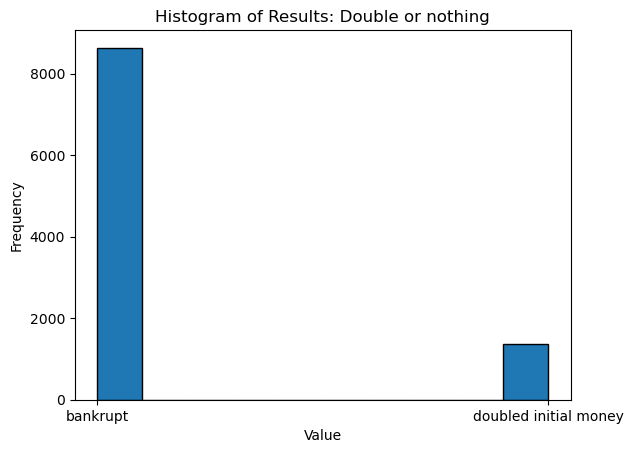

In [39]:
# Creating a histogram of the 'Rounds' column
plt.hist(df['Result'], edgecolor='k')  # Adjust bins as needed

plt.title('Histogram of Results: Double or nothing')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

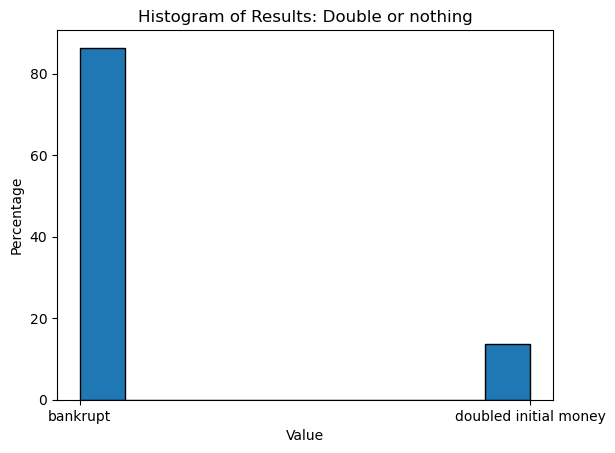

In [40]:
# Calculate weights for each data point to represent its percentage of the total
weights = np.ones_like(df['Result']) / len(df['Result']) * 100

# Creating a histogram of the 'Result' column with percentages
plt.hist(df['Result'], weights=weights, edgecolor='k')  # Adjust bins as needed

plt.title('Histogram of Results: Double or nothing')
plt.xlabel('Value')
plt.ylabel('Percentage')

# Display the histogram
plt.show()

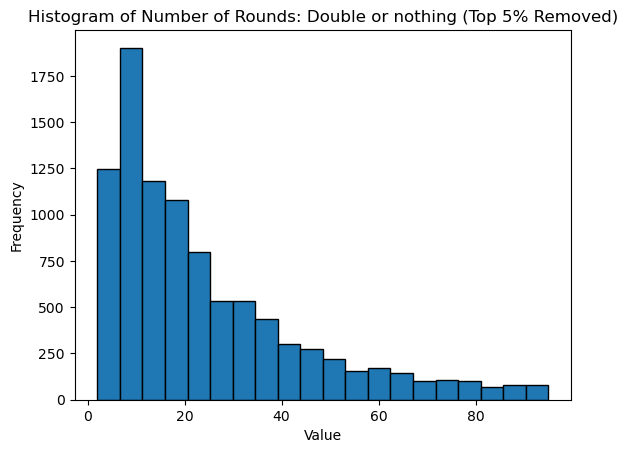

In [41]:
# Calculate the 99th percentile value
percentile_95 = df['Rounds'].quantile(0.95)

# Filter the DataFrame to remove values above the 99th percentile
filtered_df = df[df['Rounds'] <= percentile_95]

# Now plot the histogram of the filtered data
plt.hist(filtered_df['Rounds'], bins=20, edgecolor='k')

plt.title('Histogram of Number of Rounds: Double or nothing (Top 5% Removed)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

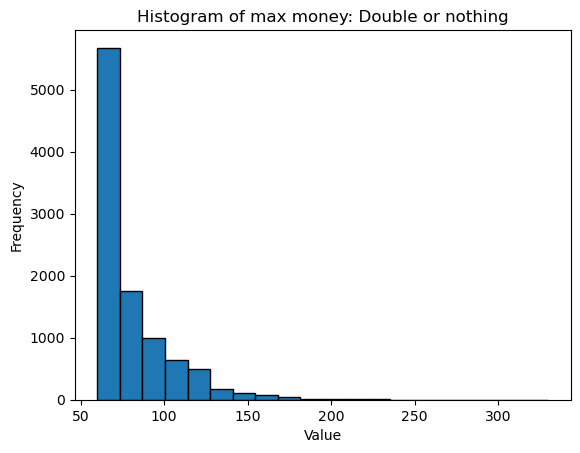

In [42]:
# Creating a histogram of the 'Max money' column
plt.hist(df['Max_Money'], bins=20, edgecolor='k')  # Adjust bins as needed

plt.title('Histogram of max money: Double or nothing')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the histogram
plt.show()